<a href="https://colab.research.google.com/github/Shivansh-datascience/Phising_detection_system/blob/main/Phising_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Phising Detection System

Problem Statement: Website and URL Phishing Detection System with Risk Scoring (Classification and Regression)
Background:
Phishing attacks targeting users through fraudulent websites and URLs are growing increasingly sophisticated. Attackers use fake websites that impersonate legitimate ones, fooling users into providing sensitive information like usernames, passwords, and financial details. Unlike email phishing, website and URL phishing relies on disguising web addresses and creating convincing, yet fraudulent, web pages. Detecting these phishing websites and URLs is crucial in mitigating data breaches and other cybercrimes.

While traditional methods rely on manual inspection of URLs and websites, these methods are insufficient due to the volume and variety of attacks. The objective is to develop an automated phishing detection system that can classify phishing URLs and websites and assign a risk score to each potential phishing threat. This system will help identify high-risk threats and allow users to make quick, informed decisions.

Objective:
The objective of this project is to build a Phishing Detection System capable of:

Classifying phishing URLs and websites: Identifying if a given URL or website is phishing or legitimate.
Assigning a risk score: Calculating a risk score that quantifies the likelihood of a URL or website being a phishing attempt. The higher the score, the more suspicious the URL or website is.
This system will focus on URL-based and website-based phishing without considering email content or features.

Specific Problem:
Classification: Detect phishing websites and URLs by classifying them as either phishing or legitimate based on features like domain name, SSL certificate status, URL structure, and other key characteristics.
Risk Scoring (Regression): Assign a risk score to each phishing attempt, indicating the likelihood that the URL or website is phishing. The risk score can be used for prioritizing phishing attempts, especially when faced with large-scale attacks.
Key Challenges:
Obfuscated URLs: Phishing URLs may use techniques like domain name spoofing, URL shortening, or encoding to disguise their intent. Identifying these patterns can be difficult.

Behavioral Mimicry: Fraudulent websites often mimic the appearance and behavior of legitimate sites (e.g., fake login pages), which requires advanced feature extraction and detection mechanisms.

Dynamic Phishing Techniques: Phishing tactics continuously evolve, requiring the system to be adaptable to new strategies such as using HTTPS (SSL certificates) to look legitimate, or using look-alike domains.

Data Imbalance: Phishing URLs and websites are generally less common than legitimate ones, leading to potential class imbalance, which can affect model performance.

Feature Extraction: Efficiently extracting the most relevant features (e.g., domain age, URL length, SSL certificate presence, presence of suspicious keywords) is critical for building an effective detection system.

Approach:
1. Classification Task (Phishing Detection):
The classification model will predict whether a given URL or website is phishing or legitimate.

Key features for phishing classification could include:

URL Features:
Length of the URL: Phishing URLs often have unusually long or short lengths.
Domain name: Look-alike domains (e.g., "google.com" vs. "goggle.com").
Special characters: Presence of unusual characters or query strings in the URL.
Use of HTTPS: Phishing websites often fail to implement HTTPS or use self-signed certificates.
Encoding: Phishing URLs may contain base64 or URL encoding to obfuscate their intent.
Website Features:
SSL certificate status: Phishing websites may lack a valid SSL certificate or show warnings in the browser.
Suspicious content: Fake login forms, misleading user interfaces, and lack of security features like two-factor authentication.
Domain age: Newly created domains are more likely to be phishing sites.
Possible classification algorithms:

Logistic Regression
Decision Trees / Random Forests
Support Vector Machines (SVM)
Neural Networks (Deep Learning)
Gradient Boosting Methods (e.g., XGBoost, LightGBM)
2. Regression Task (Risk Scoring):
The regression model will predict a risk score that quantifies the likelihood of a phishing attempt for a given URL or website.

Features influencing the risk score:

Suspicious URL Features: Unusual URL length, special characters, or obscure domain names.
SSL Certificate Presence: Websites with self-signed or invalid certificates are more likely to be phishing.
Domain Reputation: New or low-reputation domains are more likely to be associated with phishing.
Suspicious Website Behavior: Fake login forms, requests for sensitive information, or abnormal user interactions.
Possible regression algorithms:

Linear Regression
Decision Trees / Random Forests
Gradient Boosting Machines (GBM)
Neural Networks (Deep Learning)
3. Model Evaluation:
For Classification: Evaluate using metrics like accuracy, precision, recall, F1-score, and ROC-AUC.
For Regression: Evaluate using mean squared error (MSE), mean absolute error (MAE), R-squared, and root mean squared error (RMSE).
4. Dataset:
To train and test the models, we will use datasets containing labeled phishing and legitimate URLs/websites, such as:

Phishing Websites Data (contains labeled phishing URLs).
UCI Phishing Websites Data (contains features of phishing websites).
Phishing URL Dataset (a collection of phishing and legitimate URLs).
Expected Outcomes:
Phishing URL and Website Classification: The system will classify a URL or website as phishing or legitimate with high accuracy.
Risk Scoring: The system will provide a risk score for each potential phishing attempt, allowing for prioritized handling of higher-risk threats.
Real-Time Detection: The system will be capable of detecting phishing websites and URLs in real-time.
User-Friendly Interface: The system will have an interface where users can input URLs or websites and receive classification results (phishing or legitimate) and a risk score.
Deliverables:
Phishing Detection Model: A machine learning model capable of classifying phishing URLs and websites.
Risk Scoring Model: A regression model that assigns a risk score to each phishing attempt.
User Interface (UI): A front-end application where users can input URLs/websites to check for phishing and view the classification and risk score.
Documentation: Detailed documentation on the methodologies used for both classification and regression tasks, along with performance evaluation results.
Conclusion:
This Phishing Detection and Risk Scoring System will provide an automated solution to identify phishing websites and URLs, with the added functionality of risk scoring to assess the likelihood of a phishing attempt. By utilizing both classification and regression techniques, the system will help users make informed decisions and prioritize the most dangerous phishing threats.

In [258]:
#importing all packages and  dependencies according to requirements
import pandas as pd
from pyspark.sql.session import SparkSession
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

from scipy import stats  #statistical testing
from sklearn.preprocessing import OneHotEncoder , MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split , GridSearchCV , StratifiedKFold , cross_val_score
from sklearn.feature_selection import chi2 , RFE

#Classification Module packages for baseline model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import plot_tree , DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , VotingClassifier , GradientBoostingClassifier
from xgboost import XGBClassifier

#adding the base line functionality for evaluation of metrics
from sklearn.metrics import confusion_matrix , classification_report , roc_auc_score , accuracy_score
from mlxtend.plotting import plot_decision_regions

setting up the baseline model to identify the results and can improve the accuracy for model

# Extracted all the csv files from MYSQL Database and loading Files through colab environment

In [4]:
#created an sparksession for loading the large handle csv file
def load_csv_file(sparksession,file_path):
  sparksession.read.csv(file_path,header=True,inferSchema=True)
  return sparksession.read.csv(file_path,header=True,inferSchema=True)


""" creating an spark session for customer details"""
spark = SparkSession.builder.appName("Loading customer details").getOrCreate()
customer_details = load_csv_file(spark,"/content/customer_details.csv")
customer_details.show(5)  #fetching top 5 rows

""" creating an spark session for phishing details """
phishing_spark = SparkSession.builder.appName("Loading phishing details").getOrCreate()
phishing_details = load_csv_file(phishing_spark,"/content/phishing_details.csv")
phishing_details.show(5)   #fetching top 5 ros

+----------+--------------+-----------+----------+-----------------+--------------------+----------+--------------+-------------+----------------+-----------+
|URL_Length|Has_IP_Address|HTTPS_Usage|Domain_Age|Domain_Expiration|Number_of_Subdomains|Alexa_Rank|Number_of_Dots|Shortened_URL|Suspicious_Words|Customer_ID|
+----------+--------------+-----------+----------+-----------------+--------------------+----------+--------------+-------------+----------------+-----------+
|       112|             0|          0|         1|              256|                   1|    558200|             4|            1|               0|          1|
|       102|             0|          1|         9|             1474|                   1|    612421|             1|            1|               1|          2|
|        24|             0|          0|        18|              721|                   1|      6206|             3|            0|               1|          3|
|       116|             0|          1|       

# Converting the schema into pandas dataframe

In [5]:
#converting the customer details into pandas dataframe
customer_details = customer_details.toPandas()  #converted into pandas dataframe
phishing_details = phishing_details.toPandas()  #converted into pandas dataframe
print(f" top 5 rows of customer details {customer_details.head()}")
print(f" top 5 rows of phishing details {phishing_details.head()}")

 top 5 rows of customer details    URL_Length  Has_IP_Address  HTTPS_Usage  Domain_Age  Domain_Expiration  \
0         112               0            0           1                256   
1         102               0            1           9               1474   
2          24               0            0          18                721   
3         116               0            1          14               2001   
4          81               0            1           6               2452   

   Number_of_Subdomains  Alexa_Rank  Number_of_Dots  Shortened_URL  \
0                     1      558200               4              1   
1                     1      612421               1              1   
2                     1        6206               3              0   
3                     0      206480               1              1   
4                     1      212706               4              0   

   Suspicious_Words  Customer_ID  
0                 0            1  
1             

# Structure of each table

In [6]:
""" STructure for customer details """
customer_details.info()
print(f" memory used by each columns : {customer_details.memory_usage()}")
print(f" total size of each columns : {customer_details.size}")
print(f" total rows and columns : {customer_details.shape}")
print(f" descritive statistical summary : {customer_details.describe()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   URL_Length            15000 non-null  int32
 1   Has_IP_Address        15000 non-null  int32
 2   HTTPS_Usage           15000 non-null  int32
 3   Domain_Age            15000 non-null  int32
 4   Domain_Expiration     15000 non-null  int32
 5   Number_of_Subdomains  15000 non-null  int32
 6   Alexa_Rank            15000 non-null  int32
 7   Number_of_Dots        15000 non-null  int32
 8   Shortened_URL         15000 non-null  int32
 9   Suspicious_Words      15000 non-null  int32
 10  Customer_ID           15000 non-null  int32
dtypes: int32(11)
memory usage: 644.7 KB
 memory used by each columns : Index                     132
URL_Length              60000
Has_IP_Address          60000
HTTPS_Usage             60000
Domain_Age              60000
Domain_Expiration       60000
Nu

In [7]:
""" structure for phishing details """
phishing_details.info()
print(f" memory used by each columns : {phishing_details.memory_usage()}")
print(f" total size of each columns : {phishing_details.size}")
print(f" total rows and columns : {phishing_details.shape}")
print(f" descritive statistical summary : {phishing_details.describe()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Iframe_Usage            15000 non-null  int32  
 1   Mouse_Over_Behavior     15000 non-null  int32  
 2   Page_Redirects          15000 non-null  int32  
 3   DNS_Record_Validity     15000 non-null  int32  
 4   SSL_Certificate_Issuer  15000 non-null  int32  
 5   Loading_Time            15000 non-null  float64
 6   Number_of_Links         15000 non-null  int32  
 7   Favicon_Match           15000 non-null  int32  
 8   Is_Phishing             15000 non-null  int32  
 9   Risk_Score              15000 non-null  float64
 10  Customer_ID             15000 non-null  int32  
dtypes: float64(2), int32(9)
memory usage: 761.8 KB
 memory used by each columns : Index                        132
Iframe_Usage               60000
Mouse_Over_Behavior        60000
Page_Redirects      

from above observation result we can see that customer ID column is ame equivalent to customer details and phishing details
so merge both table

# merging both the dataframe

In [8]:
""" Merging both the DataFrame """
phishing_data = pd.merge(customer_details,phishing_details,on="Customer_ID")
print(phishing_data.head(5))  #top 5 rows
print(phishing_data.tail(5))  #bottom 5 rows

   URL_Length  Has_IP_Address  HTTPS_Usage  Domain_Age  Domain_Expiration  \
0         112               0            0           1                256   
1         102               0            1           9               1474   
2          24               0            0          18                721   
3         116               0            1          14               2001   
4          81               0            1           6               2452   

   Number_of_Subdomains  Alexa_Rank  Number_of_Dots  Shortened_URL  \
0                     1      558200               4              1   
1                     1      612421               1              1   
2                     1        6206               3              0   
3                     0      206480               1              1   
4                     1      212706               4              0   

   Suspicious_Words  ...  Iframe_Usage  Mouse_Over_Behavior  Page_Redirects  \
0                 0  ...             

In [9]:
phishing_data

,URL_Length,Has_IP_Address,HTTPS_Usage,Domain_Age,Domain_Expiration,Number_of_Subdomains,Alexa_Rank,Number_of_Dots,Shortened_URL,Suspicious_Words,...,Iframe_Usage,Mouse_Over_Behavior,Page_Redirects,DNS_Record_Validity,SSL_Certificate_Issuer,Loading_Time,Number_of_Links,Favicon_Match,Is_Phishing,Risk_Score
0,112,0,0,1,256,1,558200,4,1,0,...,1,1,3,1,0,4.19,22,0,0,24.819042
1,102,0,1,9,1474,1,612421,1,1,1,...,0,1,3,0,1,2.71,52,1,0,9.198524
2,24,0,0,18,721,1,6206,3,0,1,...,1,1,1,1,1,8.24,73,1,1,81.925751
3,116,0,1,14,2001,0,206480,1,1,1,...,0,1,3,1,1,8.77,12,1,0,8.777932
4,81,0,1,6,2452,1,212706,4,0,1,...,0,1,4,1,1,9.55,76,0,0,46.095709
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,82,1,0,12,2907,4,111304,1,1,1,...,1,1,4,1,1,7.03,65,0,0,17.856419
14996,109,1,0,0,885,4,855885,4,0,1,...,0,0,4,0,0,5.26,73,0,1,80.292622
14997,38,1,1,11,905,0,54183,2,0,0,...,0,1,4,1,1,4.96,73,1,0,25.445359
14998,67,0,0,10,503,0,753712,3,1,1,...,1,0,1,1,1,8.86,15,0,0,46.912222


# Identifying the Null values and duplicate values in Dataset

In [10]:
def identify_null_values(phishing_data):
  """ Identifying the null columns"""
  try:
    null_values = phishing_data.isnull().sum()  #calculated the null values accross each columns
    percentage_null_values = sum(null_values)/len(phishing_data) * 100   #calcualted the percentage of null values acccross each columns
  except Exception as e:
    raise e
  finally:
    return percentage_null_values , null_values    #return the percentage of null values and columns

percentage_null_values = identify_null_values(phishing_data)
print(f" percentage of null values accross each columns : {percentage_null_values}")
print(f" duplicate values accross each columns : {phishing_data.duplicated().sum()}")

 percentage of null values accross each columns : (0.0, URL_Length                0
Has_IP_Address            0
HTTPS_Usage               0
Domain_Age                0
Domain_Expiration         0
Number_of_Subdomains      0
Alexa_Rank                0
Number_of_Dots            0
Shortened_URL             0
Suspicious_Words          0
Customer_ID               0
Iframe_Usage              0
Mouse_Over_Behavior       0
Page_Redirects            0
DNS_Record_Validity       0
SSL_Certificate_Issuer    0
Loading_Time              0
Number_of_Links           0
Favicon_Match             0
Is_Phishing               0
Risk_Score                0
dtype: int64)
 duplicate values accross each columns : 0


sinc there are no duplicate values and null values in dataset so considering the datasets as cleaned dataset


creating an class wrapper function for assigned the columns with appropiate to their dataa type

In [11]:
class Column_Segregation:
  def __init__(self):
    self.integer_columns = []    #storing the integer value data type columns
    self.decimal_columns = []    #storing the decimal value data type columns
    self.categorical_columns = [] #storing the categorical value data type columns

  def store_columns(self):
    """ Storing the columns with appropiate data type """
    for columns in phishing_data.columns:
      if phishing_data.dtypes[columns] == "int64" or phishing_data.dtypes[columns] == "int32":
        self.integer_columns.append(columns)
      elif phishing_data.dtypes[columns] == "float64":
        self.decimal_columns.append(columns)
      else:
        self.categorical_columns.append(columns)
    return self.integer_columns , self.decimal_columns , self.categorical_columns


#calling the above class wrpaer functions
column_segregation = Column_Segregation()
integer_columns , decimal_columns , categorical_columns = column_segregation.store_columns()
print(f" integer columns : {integer_columns}")
print(f" decimal columns : {decimal_columns}")
print(f" categorical columns : {categorical_columns}")

 integer columns : ['URL_Length', 'Has_IP_Address', 'HTTPS_Usage', 'Domain_Age', 'Domain_Expiration', 'Number_of_Subdomains', 'Alexa_Rank', 'Number_of_Dots', 'Shortened_URL', 'Suspicious_Words', 'Customer_ID', 'Iframe_Usage', 'Mouse_Over_Behavior', 'Page_Redirects', 'DNS_Record_Validity', 'SSL_Certificate_Issuer', 'Number_of_Links', 'Favicon_Match', 'Is_Phishing']
 decimal columns : ['Loading_Time', 'Risk_Score']
 categorical columns : []


changing the data type of risk score columns into integer columns

In [12]:
phishing_data['Risk_Score'] = phishing_data['Risk_Score'].astype('int64')
phishing_data.dtypes

,0
URL_Length,int32
Has_IP_Address,int32
HTTPS_Usage,int32
Domain_Age,int32
Domain_Expiration,int32
Number_of_Subdomains,int32
Alexa_Rank,int32
Number_of_Dots,int32
Shortened_URL,int32
Suspicious_Words,int32


In [14]:
#saving to dataframe into colab ennvrionment
""" Saving the File """
file_location = "/content/phishing_data.csv"

#creating an custom exception handling for saving the file
try:
  phishing_data.to_csv(file_location,index=False)
  print(f" File saved successfull in {file_location}")
except Exception as e:
  raise e
except FileNotFoundError as e:
  raise e

 File saved successfull in /content/phishing_data.csv


In [17]:
#opening the new file which is store in colab enviroment
""" Opening file from colab environment """
with open(file_location,'r') as file_viewer:
  phishing_data_= pd.read_csv(file_viewer)   #opening the file in read mode
  print(phishing_data_.head(5))   #top 5 rows

   URL_Length  Has_IP_Address  HTTPS_Usage  Domain_Age  Domain_Expiration  \
0         112               0            0           1                256   
1         102               0            1           9               1474   
2          24               0            0          18                721   
3         116               0            1          14               2001   
4          81               0            1           6               2452   

   Number_of_Subdomains  Alexa_Rank  Number_of_Dots  Shortened_URL  \
0                     1      558200               4              1   
1                     1      612421               1              1   
2                     1        6206               3              0   
3                     0      206480               1              1   
4                     1      212706               4              0   

   Suspicious_Words  ...  Iframe_Usage  Mouse_Over_Behavior  Page_Redirects  \
0                 0  ...             

# Identifying the Factors affecting Phishing Probability and Non Phishing Probability

Text(0.5, 1.0, 'Distribution of Phishing Probability')

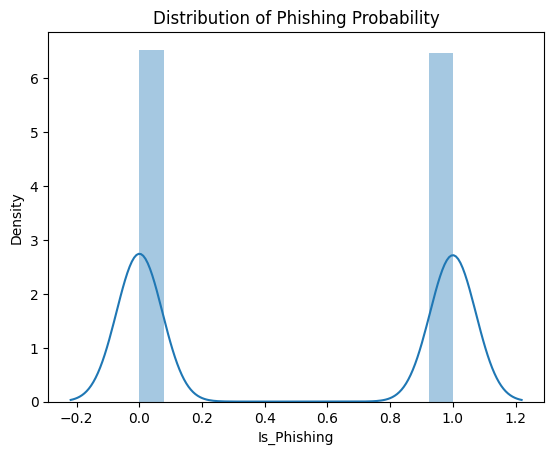

In [122]:
#distirbution of current phishing probability and non phishing probability
sns.distplot(phishing_data['Is_Phishing'])
plt.title("Distribution of Phishing Probability")

1. Current phishing detection ratio based on
 url length

       URL_Length  Is_Phishing
0             112            0
1             102            0
2              24            1
3             116            0
4              81            0
...           ...          ...
14995          82            0
14996         109            1
14997          38            0
14998          67            0
14999          57            0

[15000 rows x 2 columns]


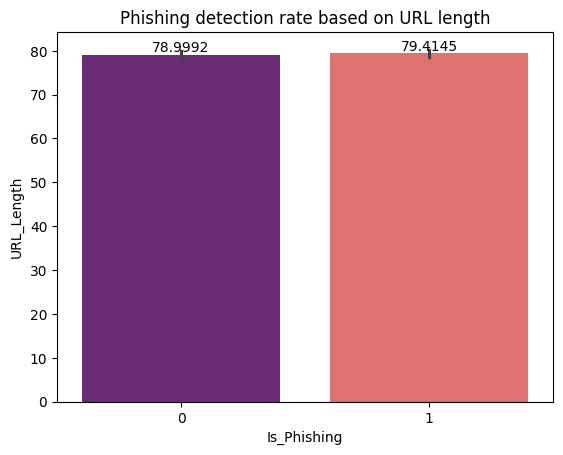

In [33]:
#counting the phishing detection sytem based on url lenth
count_phishing = phishing_data.groupby('Is_Phishing').count().reset_index()

#fetching the url lenth aand is phishing
count_phishing_url_length = phishing_data[['URL_Length','Is_Phishing']]
print(count_phishing_url_length)

#visualizing through pie chart
fig = sns.barplot(x='Is_Phishing',y='URL_Length',data=count_phishing_url_length,palette="magma")
plt.title("Phishing detection rate based on URL length")
for bars in fig.containers:
  fig.bar_label(bars)


conducting an T test stats to check the signifance of url lenth on the basis of phishing and non phishing

In [113]:
t_stats , p_value = stats.ttest_ind(phishing_data['URL_Length'],phishing_data['Is_Phishing'])
if p_value < 0.05:
  print("Reject the null hypothesis ,  significant distribution of URL length ")
else:
  print("Accept the null hypothesis , NO significant distribution of URL length")

Reject the null hypothesis ,  significant distribution of URL length 


Text(0.5, 1.0, 'Distribution of URL length')

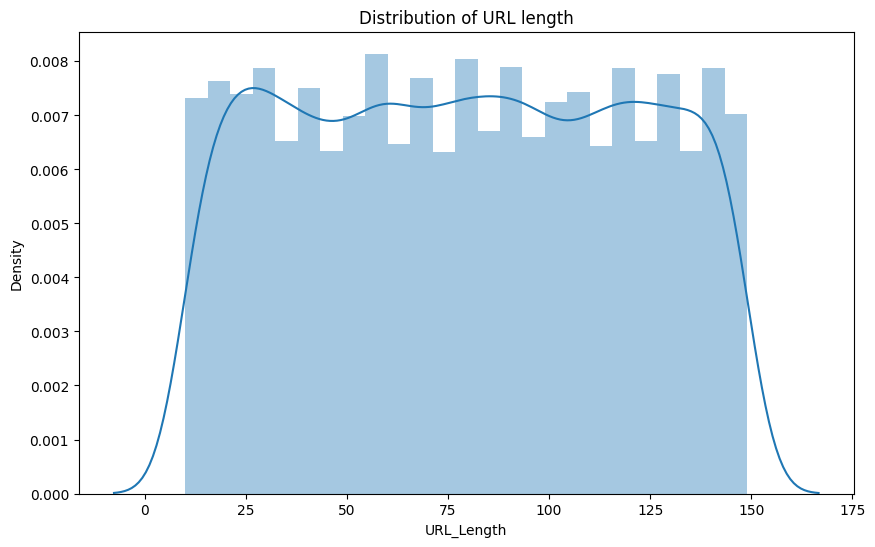

In [66]:
#distribution of URL Length
fig = plt.figure(figsize=(10,6))
sns.distplot(phishing_data['URL_Length'])
plt.title("Distribution of URL length")

let see the impact by categorizing the url length into categories
*  Short: URL length < 50
*  Medium:  URL length ≤ 100
*  Long: URL length > 100

In [39]:
try:
  phishing_data['URL_Length_Category'] = phishing_data.apply(
      lambda x: 'Short' if x['URL_Length'] < 50 else ('Medium' if x['URL_Length'] <= 100 else 'Long'),axis=1
  )
  if not phishing_data['URL_Length_Category'].empty:
    print(" URL length Category column created")
  else:
    print("URL Length Category column not created")
except Exception as e:
  raise e

 URL length Category column created


changing the URL length Category as category data tyep

In [41]:
phishing_data['URL_Length_Category'] = phishing_data['URL_Length_Category'].astype('category')
phishing_data.dtypes

,0
URL_Length,int32
Has_IP_Address,int32
HTTPS_Usage,int32
Domain_Age,int32
Domain_Expiration,int32
Number_of_Subdomains,int32
Alexa_Rank,int32
Number_of_Dots,int32
Shortened_URL,int32
Suspicious_Words,int32


now let see how the url length category affect the phishing detection

  URL_Length_Category  Is_Phishing
0                Long         5183
1              Medium         5510
2               Short         4307


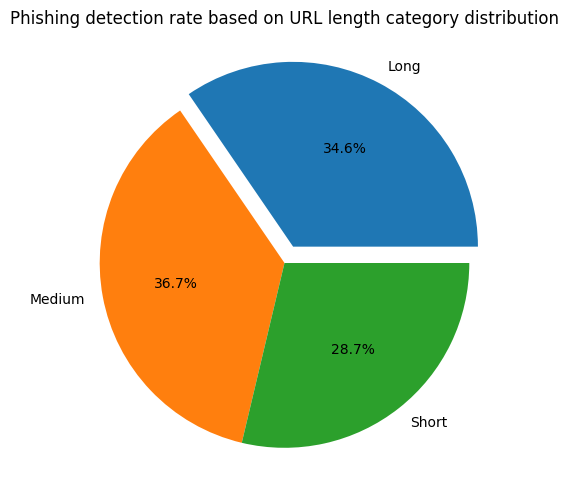

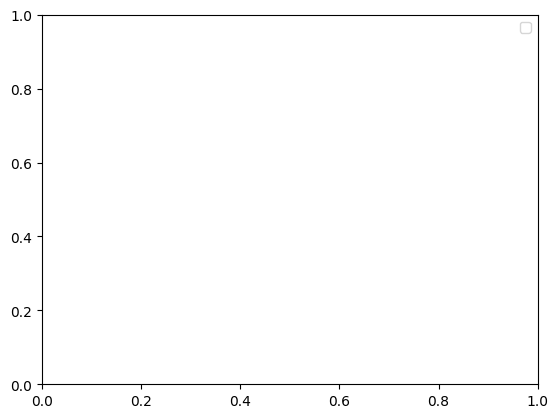

In [135]:
#calculating the count of phishing and non phishing based On url category
url_category_count_phishing = phishing_data.groupby('URL_Length_Category').agg({'Is_Phishing':'count'}).reset_index()

print(url_category_count_phishing)

#visualizing the result throug pie chart
plt.figure(figsize=(10,6))
plt.pie(
    url_category_count_phishing['Is_Phishing'],
    labels=url_category_count_phishing['URL_Length_Category'],
    autopct='%1.1f%%',explode=[0.1,0.0,0.0])

plt.title("Phishing detection rate based on URL length category distribution")
plt.show()
plt.legend()

In [105]:
URL_category_count_phishing = phishing_data.groupby('URL_Length_Category')['Is_Phishing'].value_counts(normalize=True).unstack() *100
URL_category_count_phishing = URL_category_count_phishing.reset_index()
print(URL_category_count_phishing)

Is_Phishing URL_Length_Category          0          1
0                          Long  49.700945  50.299055
1                        Medium  50.562613  49.437387
2                         Short  50.475969  49.524031


conducting the Two tail sample testing to check the group of url category based on phishing

In [108]:
#getting the Group
group_1 = phishing_data[phishing_data['URL_Length_Category'] == 'Short']['Is_Phishing']
group_2 = phishing_data[phishing_data['URL_Length_Category'] == 'Medium']['Is_Phishing']
group_3 = phishing_data[phishing_data['URL_Length_Category'] == 'Long']['Is_Phishing']

"""Conducting the Two tail sample testing"""
t_stats_1 , p_value_1 = stats.ttest_ind(group_1,group_2)   #group 1 to group 2
t_stats_2 , p_value_2 = stats.ttest_ind(group_2,group_3)   #group 2 to group 3
t_stats_3 , p_value_3 = stats.ttest_ind(group_1,group_3)   #group 1 to group 3

""" Statistical value result  """
if p_value_1  < 0.05:
  print("Reject the null hypothesis ,  significant distribution of URL length for group 1 and group 2 ")
else:
   print("Accept the null hypothesis , no significant distribution of URL length for group 1 and group 2")

if p_value_2 < 0.05:
  print("Reject the null hypothesis ,  significant distribution of URL length for group 2 and group 3 ")
else:
   print("Accept the null hypothesis , no significant distribution of URL length for group 2 and group  3")

if p_value_3 < 0.05:
  print("Reject the null hypothesis , significant distribution of URL length for group 1 and group 3 ")
else:
   print("Accept the null hypothesis , no significant distribution of URL length for group 1 and group  3")

Accept the null hypothesis , no significant distribution of URL length for group 1 and group 2
Accept the null hypothesis , no significant distribution of URL length for group 2 and group  3
Accept the null hypothesis , no significant distribution of URL length for group 1 and group  3


since Group 1 and group 2 and Group 3 are differ from each other s we will accept the hypothesis

it might be consider that based on URL category we can detect the Phishing for future perspective

2. Effect of IP Address on Phishing detection System

   Has_IP_Address  Is_Phishing
0               0         7462
1               1         7538


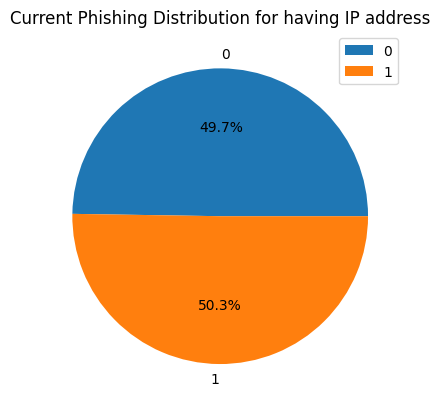

In [134]:
#calculating the Count of Phishing and Non phising based on Ip address
ip_address_phishing_count = phishing_data.groupby(["Has_IP_Address"]).agg({"Is_Phishing":"count"}).reset_index()
print(ip_address_phishing_count)

#plotting the pie plot
plt.pie(
    ip_address_phishing_count['Is_Phishing'],
    labels=ip_address_phishing_count['Has_IP_Address'],
    autopct='%1.1f%%')
plt.title("Current Phishing Distribution for having IP address")
plt.legend()

since the phishing probability for Website Having IP address is 50.3% and Non phishing probabilty for Website Having IP Address is 49.7 % so it might consider that after prediction the IP Address would be detect the more on phishing Probability rather than Non phishing probability

checking the Correlation between the IP Address and Phishing Probability

since IP Address has two labels
* 0 represent  Website url having IP Address
* 1 represent  Wesite Url having No Ip Address

Phishing Probability has Two labels
* 0 represent Phishing Probaility
* 1 represent Non phishing Probability

Since both the labels does not showing any distinction between them
Identfying the Relationship through Chi square testing

In [88]:
#let see hwo each phishing probability detect on the basis for ip address
phishing_detection_ip = phishing_data.groupby('Has_IP_Address')['Is_Phishing'].value_counts(normalize=True).unstack() * 100
print(phishing_detection_ip)

Is_Phishing             0          1
Has_IP_Address                      
0               50.455642  49.544358
1               50.026532  49.973468


checking the Chi square testing to check the significance

In [110]:
def perform_chi_square_testing(phishing_detection_ip):
  """ Performing the Chi square testing """
  try:
    chi2_stats , p_value , dof , expected = stats.chi2_contingency(phishing_detection_ip)
    threshold_value = 0.05
    if p_value < threshold_value:
      print(" There is significance relationship between IP and phishing Probability")
    else:
      print("There is no significance relationship between IP and Phishing Probaility")
  except Exception as e:
    raise e

perform_chi_square_testing(phishing_detection_ip)

There is no significance relationship between IP and Phishing Probaility


3. How phishing and non Phishing probability detect on the basis of http usage

In [125]:
phishing_detection_http = phishing_data.groupby('HTTPS_Usage')['Is_Phishing'].value_counts(normalize=True).unstack() * 100
print(phishing_detection_http)

Is_Phishing          0          1
HTTPS_Usage                      
0            50.920326  49.079674
1            49.540168  50.459832


In [140]:
#performing chi square testing
def perform_chi_square_testing(phishing_detection_http):
  """ Performing the Chi square testing """
  try:
    chi2_stats , p_value , dof , expected = stats.chi2_contingency(phishing_detection_http)
    threshold_value = 0.05
    if p_value < threshold_value:
      print(" There is significance relationship between http and phishing Probability")
    else:
      print("There is no significance relationship between http and Phishing Probaility")
  except Exception as e:
    raise e

perform_chi_square_testing(phishing_detection_http)

There is no significance relationship between http and Phishing Probaility


   HTTPS_Usage  Is_Phishing
0            0         7606
1            1         7394


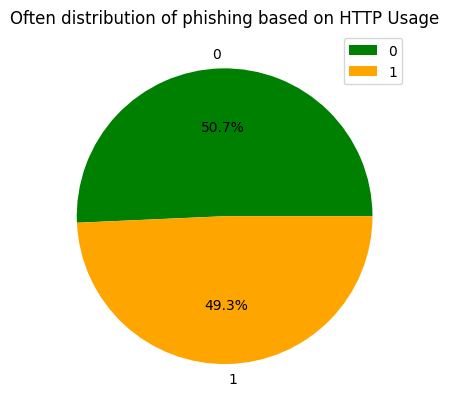

In [139]:
http_address_phishing_count = phishing_data.groupby(["HTTPS_Usage"]).agg({"Is_Phishing":"count"}).reset_index()
print(http_address_phishing_count)

#plotting the pie plot
plt.pie(
    http_address_phishing_count['Is_Phishing'],
    labels=http_address_phishing_count['HTTPS_Usage'],
    autopct='%1.1f%%',
    colors=['green','orange'],
)
plt.title("Often distribution of phishing based on HTTP Usage")
plt.legend()

how often distribution of Domain age differ from phishing probability

In [159]:
domain_age_phishing = phishing_data.groupby("Domain_Age")["Is_Phishing"].value_counts(normalize=True).unstack() * 100
print(domain_age_phishing.reset_index())

Is_Phishing  Domain_Age          0          1
0                     0  50.349650  49.650350
1                     1  47.736093  52.263907
2                     2  50.068776  49.931224
3                     3  52.010050  47.989950
4                     4  48.682386  51.317614
5                     5  52.638353  47.361647
6                     6  50.128866  49.871134
7                     7  51.491569  48.508431
8                     8  49.475066  50.524934
9                     9  47.854356  52.145644
10                   10  51.203209  48.796791
11                   11  51.478495  48.521505
12                   12  49.519890  50.480110
13                   13  48.204420  51.795580
14                   14  50.958904  49.041096
15                   15  49.315068  50.684932
16                   16  49.934811  50.065189
17                   17  50.974930  49.025070
18                   18  51.326260  48.673740
19                   19  51.235371  48.764629


Text(0, 0.5, 'Is Phishing')

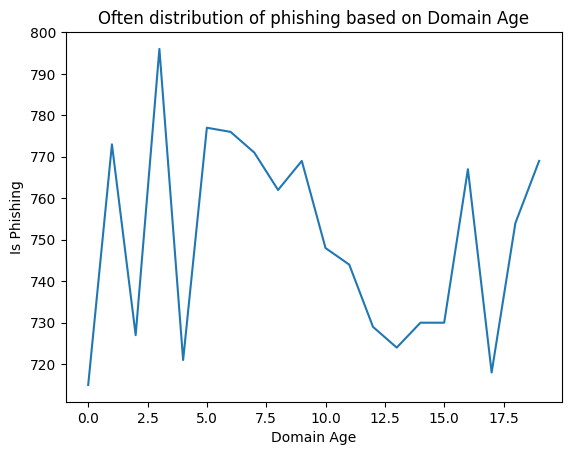

In [160]:
sns.lineplot(x='Domain_Age',y='Is_Phishing',data=domain_name_phishing_count,palette="magma")
plt.title("Often distribution of phishing based on Domain Age")
plt.xlabel("Domain Age")
plt.ylabel("Is Phishing")

older Domain Age is reducing the phising Count

Text(0.5, 1.0, 'Distribution of Domain Age')

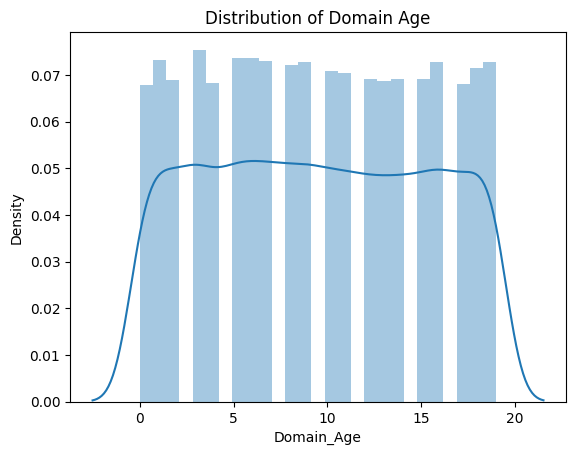

In [161]:
#let see distribution of domain age
sns.distplot(phishing_data['Domain_Age'])
plt.title("Distribution of Domain Age")

In [162]:
phishing_data['Domain_Age_Category'] = pd.qcut(phishing_data['Domain_Age'],q=3,labels=['Short','Medium','Long'])
phishing_data['Domain_Age_Category'] = phishing_data['Domain_Age_Category'].astype('category')
phishing_data.dtypes

,0
URL_Length,int32
Has_IP_Address,int32
HTTPS_Usage,int32
Domain_Age,int32
Domain_Expiration,int32
Number_of_Subdomains,int32
Alexa_Rank,int32
Number_of_Dots,int32
Shortened_URL,int32
Suspicious_Words,int32


In [165]:
#let see how domain Age category after the phishing and non phishing probability
domain_age_category_phishing = phishing_data.groupby('Domain_Age_Category')['Is_Phishing'].value_counts(normalize=True).unstack() * 100
print(domain_age_category_phishing)

def perform_chi_square_testing(domain_age_category_phishing):
  """ Performing the Chi square testing """
  try:
    chi2_stats , p_value , dof , expected = stats.chi2_contingency(domain_age_category_phishing)
    threshold_value = 0.05
    if p_value < threshold_value:
      print(" There is significance relationship between Domain Age and phishing Probability")
    else:
      print("There is no significance relationship between Domain Age and Phishing Probability")
  except Exception as e:
    raise e

perform_chi_square_testing(domain_age_category_phishing)

Is_Phishing                  0          1
Domain_Age_Category                      
Short                50.255440  49.744560
Medium               49.895178  50.104822
Long                 50.626679  49.373321
There is no significance relationship between Domain Age and Phishing Probaility


4. how domain expiration affect the Phishing and non phishing probability

domain expiration is just like days before the domain expires for any website URL

Text(0.5, 1.0, 'Distribution of Domain Expiration')

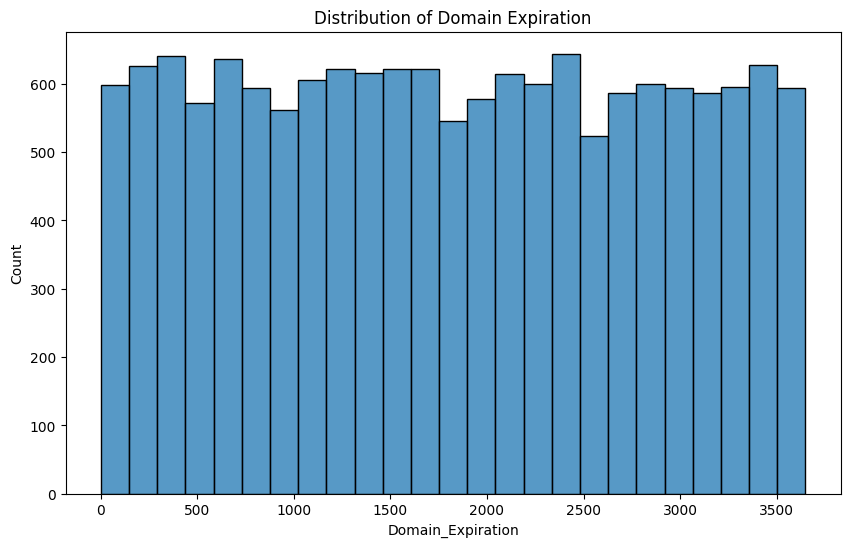

In [170]:
#let see the distribution of Domain Expiration
plt.figure(figsize=(10,6))
sns.histplot(phishing_data['Domain_Expiration'])
plt.title("Distribution of Domain Expiration")

categorizing the Domain Expiration into Multiple Categories
*  0-30 days - high risk of phishing
*  31 - 365 days = moderate risk
*  366-1825 days -  low risk
*  1826 - 3650 days - very low risk
*  3651 + days = extremely low risk


In [185]:
try:
  phishing_data["Domain_Expiration_categories"] = pd.cut(phishing_data["Domain_Expiration"],bins=5,labels=["High Risk","Moderate Risk","Low Risk","very_low_risk","extremlty_low_risk"])
  if not phishing_data["Domain_Expiration_categories"].empty:
    print("Domain Expiration is categorized into low risk , high risk , moderate risk")
  else:
    print("Domain Expiration is not categorized into low risk , high risk , moderate risk")
except Exception as e:
  raise e

Domain Expiration is categorized into low risk , high risk , moderate risk


Text(0.5, 1.0, 'Distribution of Domain Expiration categories')

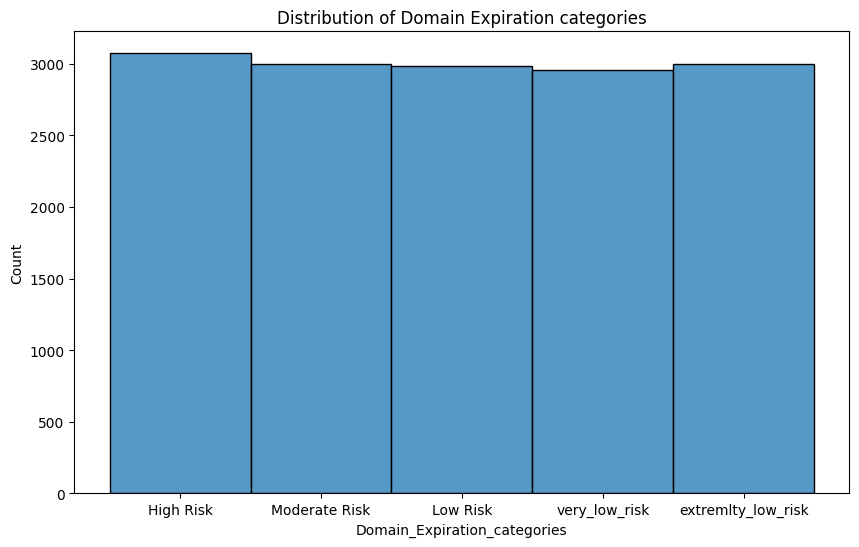

In [186]:
plt.figure(figsize=(10,6))
sns.histplot(phishing_data['Domain_Expiration_categories'])
plt.title("Distribution of Domain Expiration categories")

Is_Phishing Domain_Expiration_categories          0          1
0                              High Risk  48.470052  51.529948
1                          Moderate Risk  49.432955  50.567045
2                               Low Risk  51.694062  48.305938
3                          very_low_risk  50.355571  49.644429
4                     extremlty_low_risk  51.301736  48.698264


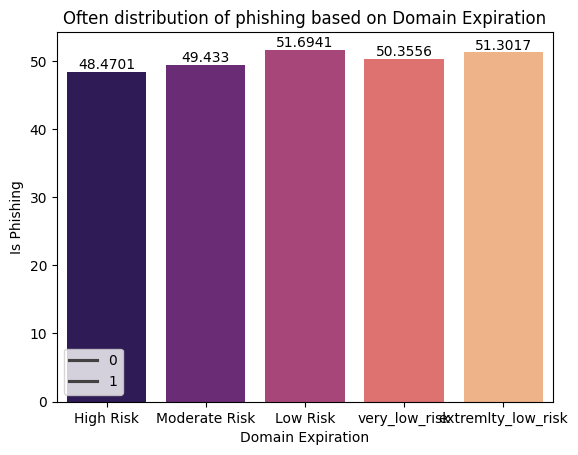

In [200]:


#let see how domain expiration days categories help in phising probability
domain_expiration_phishing = phishing_data.groupby('Domain_Expiration_categories')['Is_Phishing'].value_counts(normalize=True).unstack() * 100
# Reset the index
domain_expiration_phishing = domain_expiration_phishing.reset_index()
print(domain_expiration_phishing)

# Access the 'Is_Phishing' column correctly
sns.barplot(x='Domain_Expiration_categories', y=domain_expiration_phishing.columns[1], data=domain_expiration_phishing, palette="magma")
plt.title("Often distribution of phishing based on Domain Expiration")
plt.xlabel("Domain Expiration")
plt.ylabel("Is Phishing")
plt.legend(domain_expiration_phishing.columns[1:])

for bars in plt.gca().containers:
  plt.bar_label(bars)

now let see how domain expiration helps in phising detection

In [187]:
#let see how domain Age category after the phishing and non phishing probability
domain_expiration_category_phishing = phishing_data.groupby('Domain_Expiration_categories')['Is_Phishing'].value_counts(normalize=True).unstack() * 100
print(domain_expiration_category_phishing)

def perform_chi_square_testing(domain_expiration_category_phishing):
  """ Performing the Chi square testing """
  try:
    chi2_stats , p_value , dof , expected = stats.chi2_contingency(domain_expiration_category_phishing)
    threshold_value = 0.05
    if p_value < threshold_value:
      print(" There is significance relationship between Domain Age and phishing Probability")
    else:
      print("There is no significance relationship between Domain Age and Phishing Probability")
  except Exception as e:
    raise e

perform_chi_square_testing(domain_expiration_category_phishing)

Is_Phishing                           0          1
Domain_Expiration_categories                      
High Risk                     48.470052  51.529948
Moderate Risk                 49.432955  50.567045
Low Risk                      51.694062  48.305938
very_low_risk                 50.355571  49.644429
extremlty_low_risk            51.301736  48.698264
There is no significance relationship between Domain Age and Phishing Probability


since there is no significance differnece between the catgeory and phishing so it might be give inaccurate result so it should not consider to be


how number of subdomains effect the phishing probability


Text(0.5, 1.0, 'Distribution of Number of Subdomains')

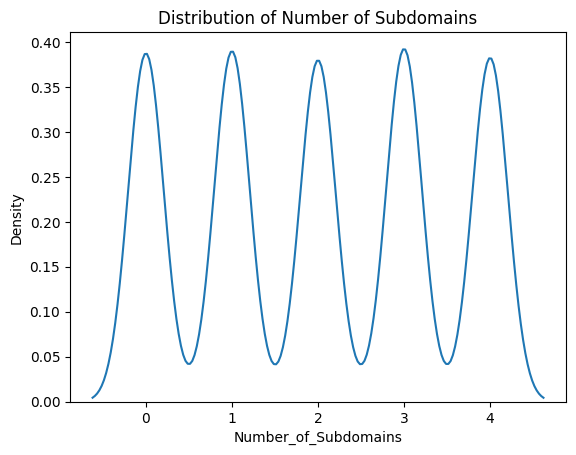

In [197]:
#let see distrution of number of subdomains
sns.kdeplot(phishing_data['Number_of_Subdomains'])
plt.title("Distribution of Number of Subdomains")

*  0-1 subdomain likely to be legitimate site
*  1-2 subdomain can be legitimate site but possible to watch out for suspicious behaviour

*  2-3 subdomain and 3-4 subdomain can detect the susspicous threat for phising



let see how tyep of each subdomain affect the phising probability

Is_Phishing  Number_of_Subdomains          0          1
0                               0  49.335106  50.664894
1                               1  50.776346  49.223654
2                               2  50.593421  49.406579
3                               3  50.475878  49.524122
4                               4  50.016841  49.983159


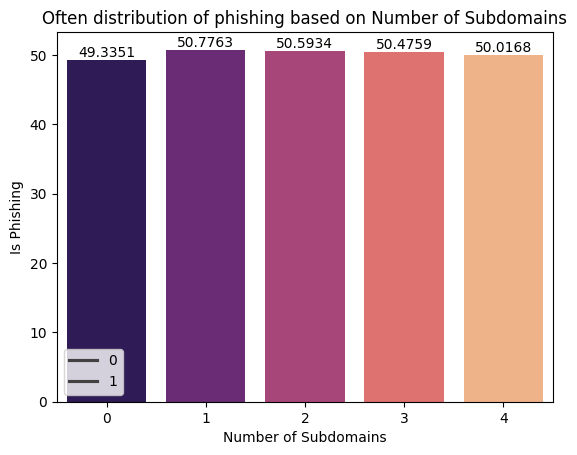

In [203]:
sub_domain_phishing = phishing_data.groupby('Number_of_Subdomains')['Is_Phishing'].value_counts(normalize=True).unstack() * 100

#reset index
sub_domain_phishing = sub_domain_phishing.reset_index()
print(sub_domain_phishing)

sns.barplot(x='Number_of_Subdomains',y=sub_domain_phishing.columns[1],data=sub_domain_phishing,palette="magma")
plt.title("Often distribution of phishing based on Number of Subdomains")
plt.xlabel("Number of Subdomains")
plt.ylabel("Is Phishing")
plt.legend(sub_domain_phishing.columns[1::])

for bars in plt.gca().containers:
  plt.bar_label(bars)

performing the two tail sample testing differ from phising detection system

In [205]:
group_1 = phishing_data[phishing_data['Number_of_Subdomains'] == 0]['Is_Phishing']
group_2 = phishing_data[phishing_data['Number_of_Subdomains'] == 1]['Is_Phishing']
group_3 = phishing_data[phishing_data['Number_of_Subdomains'] == 2]['Is_Phishing']
group_4 = phishing_data[phishing_data['Number_of_Subdomains'] == 3]['Is_Phishing']
group_4 = phishing_data[phishing_data['Number_of_Subdomains'] == 4]['Is_Phishing']

""" Performing the T_test testing """
t_stats_1 , p_value_1 = stats.ttest_ind(group_1,group_2)
t_stats_2 , p_value_2 = stats.ttest_ind(group_2,group_3)
t_stats_3 , p_value_3 = stats.ttest_ind(group_3,group_4)

if p_value_1 < 0.05:
  print("Reject the null hypothesis ,  significant distribution in  group 1 and group 2 ")
else:
   print("Accept the null hypothesis , no significant distribution in group 1 and group 2")


if p_value_2 < 0.05:
  print("Reject the null hypothesis ,  significant distribution in  group 2 and group 3 ")
else:
   print("Accept the null hypothesis , no significant distribution in group 3 and group 3")


if p_value_3 < 0.05:
  print("Reject the null hypothesis ,  significant distribution in  group 3 and group 4 ")
else:
   print("Accept the null hypothesis , no significant distribution in group 3 and group 4")


Accept the null hypothesis , no significant distribution in group 1 and group 2
Accept the null hypothesis , no significant distribution in group 3 and group 3
Accept the null hypothesis , no significant distribution in group 3 and group 4


since there is no significant distribution so it might be considered to not to select this feature

5. how Alexa Rank helps to detect the phishing probability

Alexa Rank is a ranking system that measures the popularity of a website based on its traffic. It was provided by Alexa Internet, a subsidiary of Amazon (which shut down in 2022)

Low Rank (Popular & Trusted): Alexa Rank ≤ 100,000

Medium Rank (Moderate Popularity): Alexa Rank 100,001 – 1,000,000

High Rank (Suspicious/Unpopular): Alexa Rank > 1,000,000



In [263]:
#categorizing the alexa rank on the basis of rank
def categorize_alexa_rank(rank):
  if rank <= 100000:
    return "Low Rank"
  elif rank <= 1000000:
    return "Medium Rank"
  else:
    return "High Rank"

phishing_data['Alexa_Rank_Category'] = phishing_data['Alexa_Rank'].apply(categorize_alexa_rank)
phishing_data['Alexa_Rank_Category'] = phishing_data['Alexa_Rank_Category'].astype('category')

let see how rank distributed the on the basis fo phising

Is_Phishing Alexa_Rank_Category          0          1
0                      Low Rank  49.692833  50.307167
1                   Medium Rank  50.299224  49.700776


([<matplotlib.patches.Wedge at 0x7da902ab2950>,
 [Text(0.010478409200932785, 1.0999500911135096, 'Low Rank'),
  Text(-0.01047818191596883, -1.0999500932786614, 'Medium Rank')],
 [Text(0.005715495927781519, 0.5999727769710052, '49.7%'),
  Text(-0.005715371954164815, -0.5999727781519971, '50.3%')])

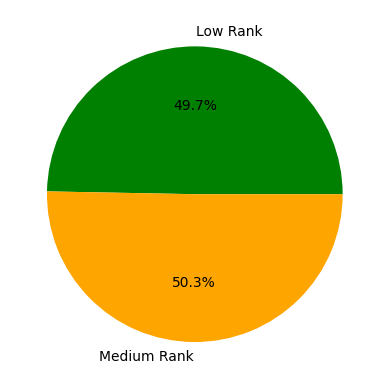

In [267]:
distribution_rank_category = phishing_data.groupby('Alexa_Rank_Category')['Is_Phishing'].value_counts(normalize=True).unstack() * 100
distribution_rank_category = distribution_rank_category.reset_index()
print(distribution_rank_category)


plt.pie(
    distribution_rank_category[0],
    labels=distribution_rank_category['Alexa_Rank_Category'],
    autopct='%1.1f%%',
    colors=['green','orange'],
)

since high rank decides yur suspicous phising threat on website so there is no signifanctly relations between the phising probability

6. how Number of dots affect the website url for reducing the phishing rate

Is_Phishing  Number_of_Dots          0          1
0                         1  49.413299  50.586701
1                         2  50.571656  49.428344
2                         3  50.267380  49.732620
3                         4  50.736900  49.263100


<Axes: xlabel='Number_of_Dots', ylabel='1'>

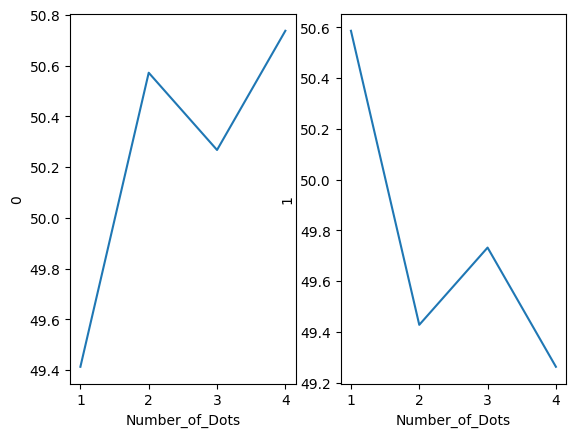

In [276]:
#how number dots increase the phishing count
count_phishing_based_on_number_of_dots = phishing_data.groupby('Number_of_Dots')['Is_Phishing'].value_counts(normalize=True).unstack() * 100
count_phishing_based_on_number_of_dots = count_phishing_based_on_number_of_dots.reset_index()
print(count_phishing_based_on_number_of_dots)

fig , ax = plt.subplots(nrows=1,ncols=2)

sns.lineplot(x='Number_of_Dots',y=count_phishing_based_on_number_of_dots.columns[1],data=count_phishing_based_on_number_of_dots,palette="magma",ax=ax[0])
sns.lineplot(x='Number_of_Dots',y=count_phishing_based_on_number_of_dots.columns[2],data=count_phishing_based_on_number_of_dots,palette="magma",ax=ax[1])

<Axes: xlabel='Number_of_Dots', ylabel='1'>

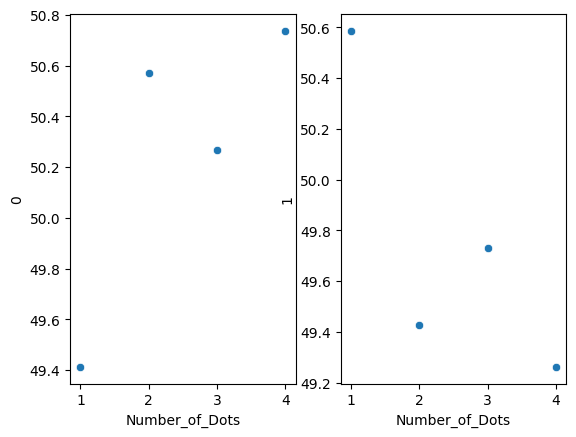

In [280]:
fig , ax = plt.subplots(nrows=1,ncols=2)

sns.scatterplot(x='Number_of_Dots',y=count_phishing_based_on_number_of_dots.columns[1],data=count_phishing_based_on_number_of_dots,ax=ax[0])
sns.scatterplot(x='Number_of_Dots',y=count_phishing_based_on_number_of_dots.columns[2],data=count_phishing_based_on_number_of_dots,ax=ax[1])

so Number of dots so Positive colinearity for Non phising  and Negative colinearity fir Number of odst increase for phising

so it might consider model predicts the number of dost it will detect and predict more for non phising detection and reduce the phising probability

In [282]:
#let check for chi square testing to select the signifcant features
def perform_chi_square_testing(count_phishing_based_on_number_of_dots):
  """ Performing the Chi square testing """
  chi_stats , p_value , dof , expected = stats.chi2_contingency(count_phishing_based_on_number_of_dots)
  threshold_value = 0.05
  if p_value < threshold_value:
    print(" There is significance relationship between Number of Dots and phishing Probability")
  else:
    print("There is no significance relationship between Number of Dots and Phishing Probability")

perform_chi_square_testing(count_phishing_based_on_number_of_dots)

There is no significance relationship between Number of Dots and Phishing Probability


since the Chi square test failed to reject the Hypothesis but number of dots increase the Non phisinh probability and reducing the Phising Probability so it will consider as feature

7.  HTTP Usage effect on Phising Detection System

Is_Phishing  HTTPS_Usage          0          1
0                      0  50.920326  49.079674
1                      1  49.540168  50.459832


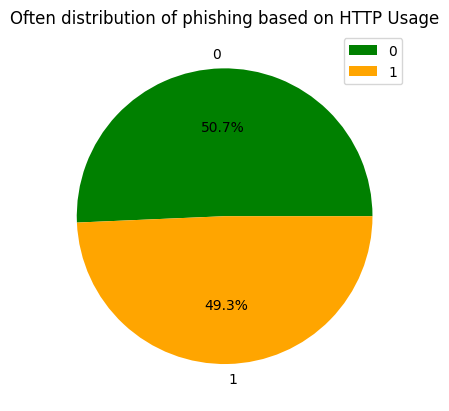

In [288]:
#let see how Having HTTPS in website url detect the phising Probability and Non phising Probability
http_address_phishing_count = phishing_data.groupby("HTTPS_Usage")["Is_Phishing"].value_counts(normalize=True).unstack() * 100

#reseting index
http_address_phishing_count = http_address_phishing_count.reset_index()
print(http_address_phishing_count)

#plotting the pie plot
plt.pie(
    http_address_phishing_count[0],
    labels=http_address_phishing_count['HTTPS_Usage'],
    autopct='%1.1f%%',
    colors=['green','orange'],
)

plt.title("Often distribution of phishing based on HTTP Usage")
plt.legend()

since having HTTPS in webiste url helps to detect the Phising website so it can be helpful as it doesnot show any correlations between them